# Prosper Loans Data
## by Mariam Haji

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> There are total of 113,937 loans entries saved in the dataset and 81 attributes. Each loan contains information on loan amount, borrower rate, current loan status, borrower income, borrowers occupation, and many others.

### What is/are the main feature(s) of interest in your dataset?

> The Borrower's APR will be analyzied with many factors such as the LoanStatus, BorrowerAPR, ProsperScore, Occupation, ListingCategory, DelinquenciesLast7Years, CreditScoreRangeUpper.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some of the features that will help support my investigation are: BorrowerAPR, ProsperScore, Credit Score, Listing Category. 

## Univariate Exploration

In [3]:
#Create a copy of the dataset
loans = df.copy()
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#Drop columns we dont need

loans.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 
            'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 
            'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 
            'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 
            'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 
            'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 61 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Term                                113937 non-null  int64  
 1   LoanStatus                          113937 non-null  object 
 2   BorrowerAPR                         113912 non-null  float64
 3   BorrowerRate                        113937 non-null  float64
 4   LenderYield                         113937 non-null  float64
 5   EstimatedEffectiveYield             84853 non-null   float64
 6   EstimatedLoss                       84853 non-null   float64
 7   EstimatedReturn                     84853 non-null   float64
 8   ProsperRating (numeric)             84853 non-null   float64
 9   ProsperRating (Alpha)               84853 non-null   object 
 10  ProsperScore                        84853 non-null   float64
 11  ListingCategory (numeric) 

In [5]:
#let's check for duplicates in our new dataset

sum(loans.duplicated())

0

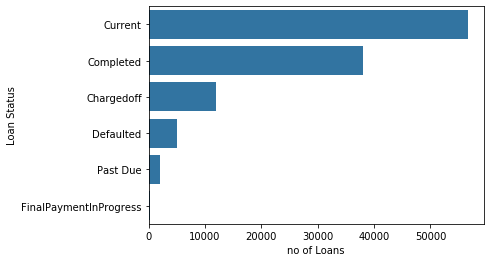

In [6]:
#We will begin by checking loan status

loans['LoanStatus'] = loans['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert to a categorical variable
loan_status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

ordered_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status_dict)

loans['LoanStatus'] = loans['LoanStatus'].astype(ordered_loan_status)

#Plot a barchart for the loan status
default_color = sb.color_palette()[0]

# Order the categorical variable type
cat_order = loans['LoanStatus'].value_counts().index

sb.countplot(data = loans, y = 'LoanStatus', color = default_color, order = cat_order)
plt.xlabel('no of Loans')
plt.ylabel('Loan Status');

Seems like more than 80% of loans are current or completed with around 50% being chargedoff and defaulted and about 10% of loans are past due

In [7]:
# check where APR has the most counts

loans.BorrowerAPR.value_counts().head()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
Name: BorrowerAPR, dtype: int64

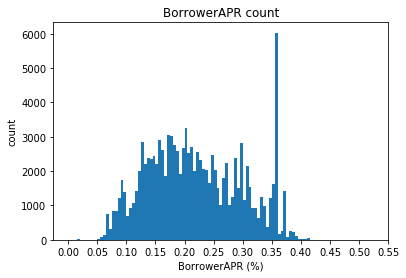

In [8]:
#Let's map the BorrowerAPR count

bins = np.arange(0, loans['BorrowerAPR'].max(), 0.005)
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, loans['BorrowerAPR'].max()+0.05, 0.05));

There is roughly one normal distribution with two exceptional high counts when BorrowerAPR are 0.358% and 0.356%.

In [9]:
#Now let's check the ProsperScore count

loans['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

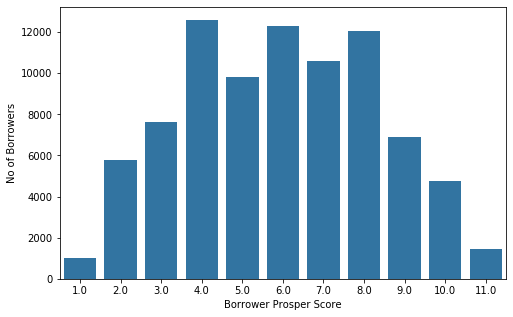

In [10]:
#Plot a graph of ProsperScore

binsize = 1
bins = np.arange(0, loans['ProsperScore'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sb.countplot(data = loans, x = 'ProsperScore', color = default_color)
plt.xlabel('Borrower Prosper Score')
plt.ylabel('No of Borrowers');

Most borrowers have a propser score of around 4.0 and most borrowers are between 2.0 and 10.0

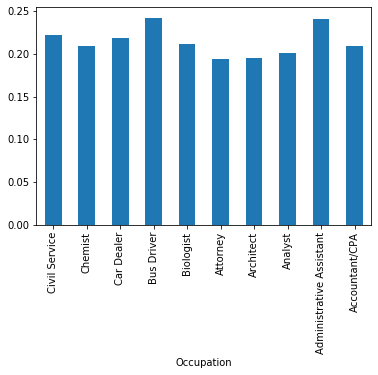

In [23]:
#I wonder what occupation most borrowes are in

Top_Occupation = loans.groupby('Occupation').BorrowerAPR.mean()[9::-1]
Top_Occupation.plot(kind = 'bar');

Here we see the occupation of the top 10 borrowers and most borrowers are administrative assistants followed by bus driver

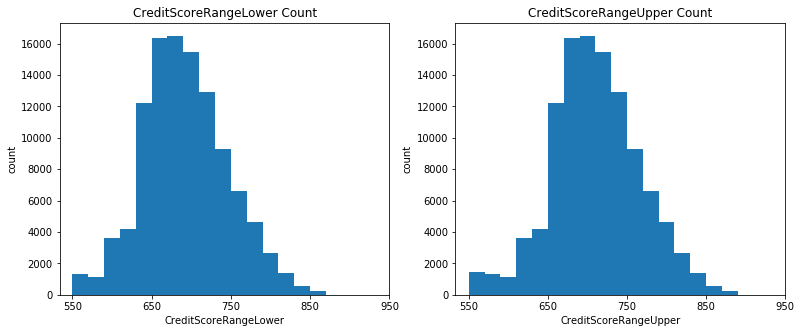

In [12]:
#Lower vs higher credit score

plt.figure(figsize = [13, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(550, loans['CreditScoreRangeLower'].max(), 20)
plt.hist(data = loans, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeLower Count')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(550, loans['CreditScoreRangeUpper'].max(), 20)
plt.hist(data = loans, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeUpper Count')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('count');

The credit scores have the same trend and are the same both skewed a bit to the right.

In [13]:
# Decode ListingCategory (numeric) feature

list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loans['ListingCategory'] = loans['ListingCategory (numeric)'].map(list_dict)

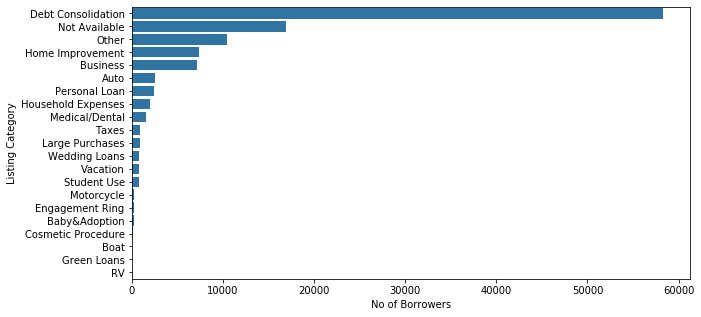

In [14]:
# Loan ListingCategory Plot
plt.figure(figsize=[10, 5])

cat_order = loans['ListingCategory'].value_counts().index

sb.countplot(data = loans, y = 'ListingCategory', color = default_color, order = cat_order)
plt.ylabel('Listing Category')
plt.xlabel('No of Borrowers');

The debt consolidated is the most popular loan followed by not available then other and home improvement.

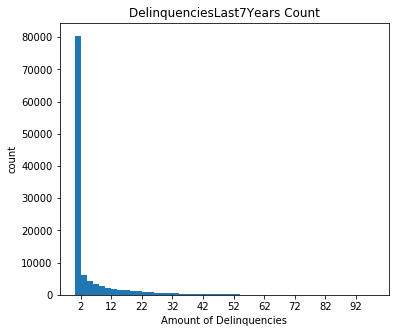

In [15]:
# Delinquencies records count from the Last 7Years. 

plt.figure(figsize = [13, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(0, loans['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = loans, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

Most borrowers don't have Delinquencies

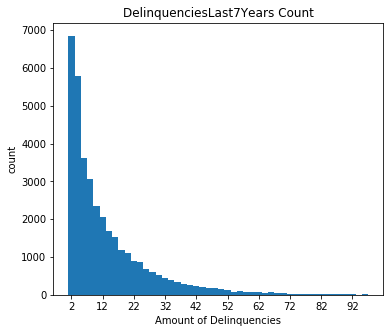

In [16]:
# Delinquencies records count from the Last 7Years excluding borrowers with 0 delinquencies. 

plt.figure(figsize = [13, 5]) 

plt.subplot(1, 2, 2)
bins = np.arange(1, loans['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = loans, x = 'DelinquenciesLast7Years', bins = bins)
plt.xticks(np.arange(2, 100+1, 10))
plt.title('DelinquenciesLast7Years Count')
plt.xlabel('Amount of Delinquencies')
plt.ylabel('count');

This plot shows Delinquencies excluding borrowers with 0 delinquencies

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Two BorrowerAPR countwere higher than the rest, which I have left untouched. I also needed to change the listing values to categories in order to see which listing had the highest loan values.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The countplots for ProsperScore, Occupation, DelinquenciesLast7Years are right skewed. CreditScoreRangeUpper & CreditScoreRangeLower follow a normal distribution curve.

## Bivariate Exploration

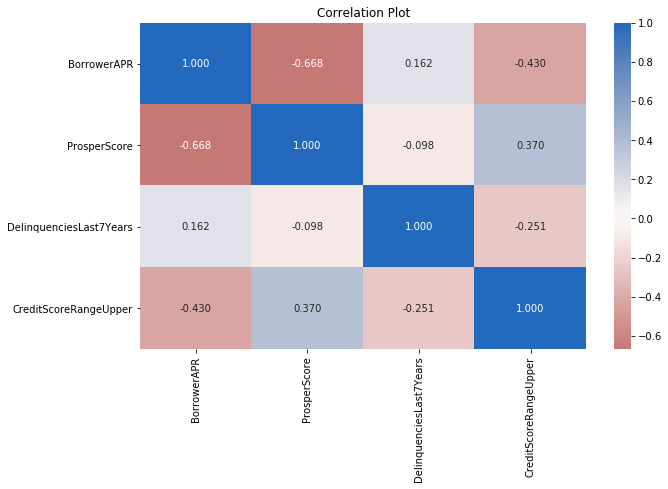

In [17]:
# correlation plot 

loans_vars = ['LoanStatus', 'BorrowerAPR', 'ProsperScore', 'Occupation', 'DelinquenciesLast7Years', 
            'CreditScoreRangeUpper', 'ListingCategory']

plt.figure(figsize = [10, 6])
sb.heatmap(loans[loans_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

There aren't any strong positive relationships between the category pairs. BorrowerAPR, DelinquenciesLast7Years and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. Similarly, higher CreditScore means the borrowers are more trustworthy, therefore it recevied lower APR.

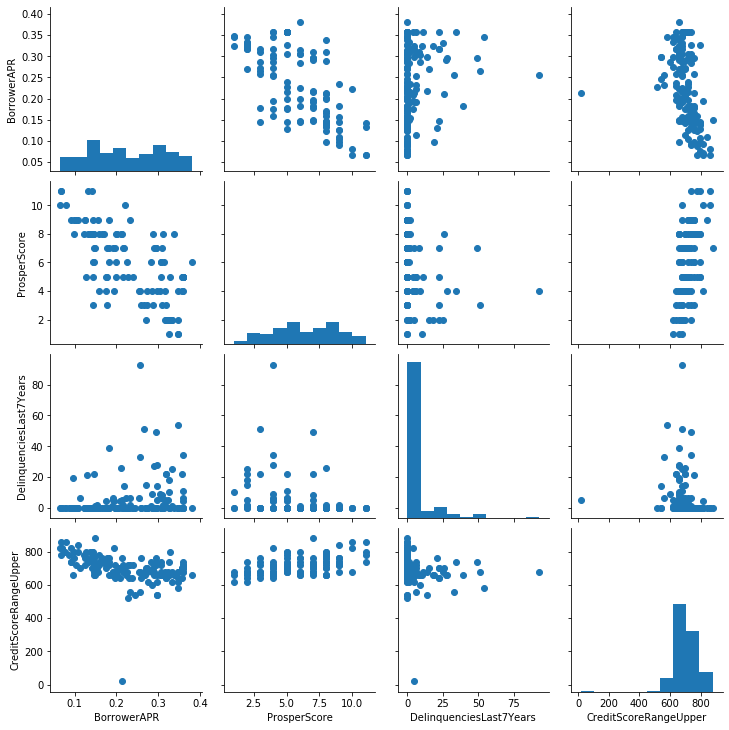

In [18]:
#For more insight a plot a scatter plot with 150 samples for the above categories

loans_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 'CreditScoreRangeUpper']

samples = np.random.choice(loans.shape[0], 150, replace = False)
loan_samp = loans.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = loans_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

The correlation between the matrixes shows that ProsperScore seems to be more related to BorrowerAPR as compared to other variables and delinquenciesLast7Years is positevly skewed

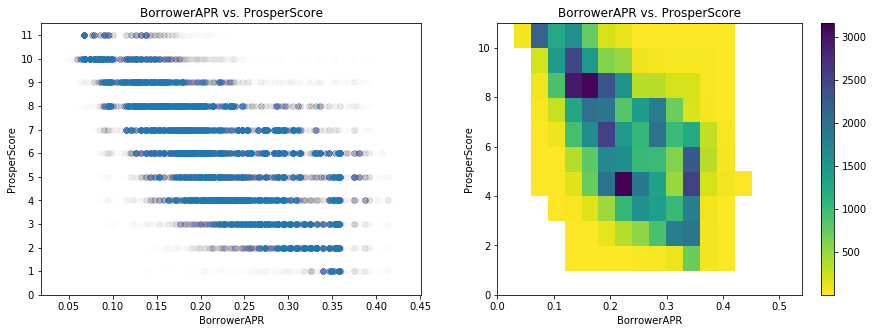

In [19]:
#More plots for ProsperScore vs BorrowerAPR

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loans, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, loans['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, loans['ProsperScore'].max()+1, 1)
plt.hist2d(data = loans, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

BorrowerAPR vs. ProsperScore shows people with higher rating of prosper score have have a low borrowerAPR

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> After creating a correaltion map, I found there aren't any storng positive relationships between pairs of the categories and that some were negative. I also noted that BorrowerAPR and ProsperScore have a closer relation as to the other probably because people with a higher rating have a better chance at paying and are more relaible than people with a lower rating

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The delinquenciesLast7Years is positevly skewed

## Multivariate Exploration

We can see that borrowers with high prosper score completed their loan and second to that are borrowers on their final payments in progress status

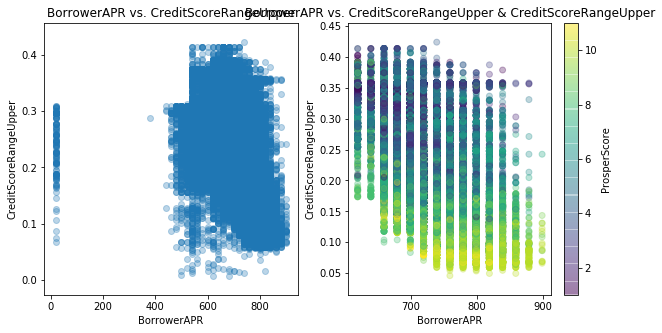

In [20]:
#BorrowerAPR vs CreditScoreRangeUpper vs ProsperScore

plt.figure(figsize = [10, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loans, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.3)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
plt.scatter(data = loans, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

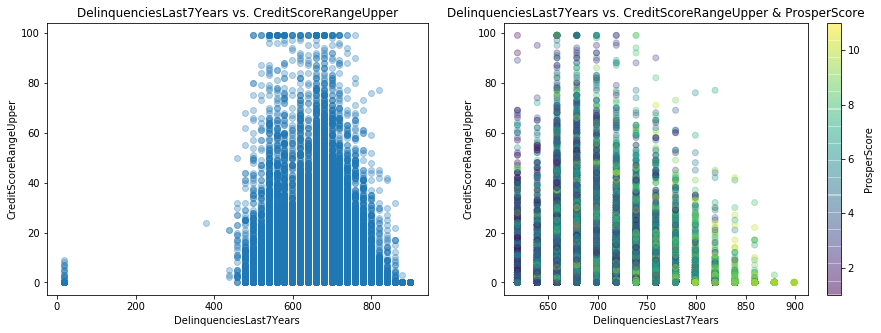

In [21]:
#DelinquenciesLast7Years vs CreditScoreRangeUpper vs ProsperScore

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loans, x = 'CreditScoreRangeUpper', y = 'DelinquenciesLast7Years', alpha = 0.3)
plt.title('DelinquenciesLast7Years vs. CreditScoreRangeUpper')
plt.xlabel('DelinquenciesLast7Years')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
plt.scatter(data = loans, x = 'CreditScoreRangeUpper', y = 'DelinquenciesLast7Years', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('DelinquenciesLast7Years vs. CreditScoreRangeUpper & ProsperScore')
plt.xlabel('DelinquenciesLast7Years')
plt.ylabel('CreditScoreRangeUpper');

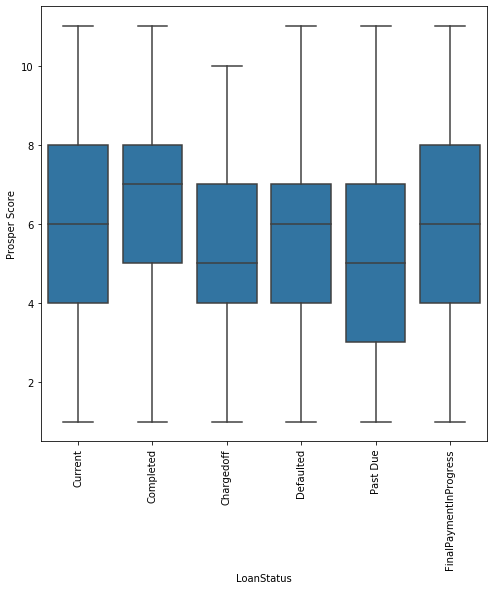

In [22]:
# LoanStatus vs ProsperScore

cat_order = loans['LoanStatus'].value_counts().index

plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax2 = sb.boxplot(data=loans, x='LoanStatus', y='ProsperScore', color = default_color, order=cat_order)
plt.ylabel('Prosper Score')
plt.xticks(rotation=90);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We can see that borrowers with high prosper score completed their loan and second to that are borrowers on their final payments in progress status. We can also see that the higher the ProsperScore the lower the delinquenciesLast7Years and the lower the creditscore range.

### Were there any interesting or surprising interactions between features?

> Yes though we don't know why but the higher the prosper score of borrowers the more loans were completed. This could also be due to an external factor or further analysis on the dataset.